## WRAPPER METHODS

https://www.codecademy.com/paths/data-science/tracks/dsml-feature-engineeering-for-ds/modules/dsml-wrapper-methods/lessons/fe-wrapper-methods-lesson/exercises/fe-review

Wrapper methods for feature selection are algorithms that select features by evaluating the performance of a machine learning model on different subsets of features. Here are some advantages of wrapper methods.

They can detect relationships between features that might be relevant to the machine learning model.
Unlike filter methods, they are designed to choose features that are relevant to whatever machine learning model you are using.
We covered four different greedy wrapper methods and implemented them using mlextend in Python.

- Sequential forward selection adds one feature at a time.
- Sequential backward selection removes one feature at a time.
- Sequential forward floating selection adds (and sometimes removes) one feature at a time.
- Sequential backward floating selection removes (and sometimes adds) one feature at a time.

- We also covered recursive feature elimination, which ranks features by importance and removes the least important feature at every step. We used the scikit-learn library to implement that algorithm and investigate the results.

In [45]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

In [43]:
import numpy as np

In [3]:
# Load the data
health = pd.read_csv("data_breast_cancer.csv")
# Split independent and dependent variables
X = health.iloc[:,:-1]
y = health.iloc[:,-1]

In [4]:
X.shape

(116, 9)

In [5]:
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [6]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classification, dtype: int64

In [7]:
# Logistic regression model
lr = LogisticRegression(max_iter=1000)

In [8]:
lr.fit(X, y)

LogisticRegression(max_iter=1000)

In [9]:
lr.score(X, y)

0.8017241379310345

In [10]:
df_coef = pd.DataFrame({"COEF": lr.coef_[0],
              "NAMES": lr.feature_names_in_}).sort_values("COEF")
df_coef

,COEF,NAMES
4,-0.227798,HOMA
1,-0.145462,BMI
0,-0.023319,Age
5,-0.011065,Leptin
6,-0.005576,Adiponectin
8,0.000687,MCP.1
7,0.058573,Resistin
2,0.097191,Glucose
3,0.119650,Insulin


# NOW LETS WRAP 

### SFS - SQEUENTIAL FORWARD SELECTION 

In [11]:
# Set up SFS parameters
sfs = SFS(lr,
           k_features=3, # number of features to select
           forward=True,
           floating=False,
           scoring='accuracy',
           cv=0)
# Fit SFS to our features X and outcome y   
sfs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          k_features=3, scoring='accuracy')

In [13]:
sfs.k_feature_names_

('Age', 'Glucose', 'Insulin')

In [17]:
sfs.get_metric_dict()

/Users/amlvt225/anaconda3/envs/data_science_env/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/amlvt225/anaconda3/envs/data_science_env/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{1: {'feature_idx': (2,),
  'cv_scores': array([0.72413793]),
  'avg_score': 0.7241379310344828,
  'feature_names': ('Glucose',),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 2: {'feature_idx': (0, 2),
  'cv_scores': array([0.73275862]),
  'avg_score': 0.7327586206896551,
  'feature_names': ('Age', 'Glucose'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 3: {'feature_idx': (0, 2, 3),
  'cv_scores': array([0.76724138]),
  'avg_score': 0.7672413793103449,
  'feature_names': ('Age', 'Glucose', 'Insulin'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan}}

## This details how each iteration worked and what was added 

In [18]:
sfs.subsets_

{1: {'feature_idx': (2,),
  'cv_scores': array([0.72413793]),
  'avg_score': 0.7241379310344828,
  'feature_names': ('Glucose',)},
 2: {'feature_idx': (0, 2),
  'cv_scores': array([0.73275862]),
  'avg_score': 0.7327586206896551,
  'feature_names': ('Age', 'Glucose')},
 3: {'feature_idx': (0, 2, 3),
  'cv_scores': array([0.76724138]),
  'avg_score': 0.7672413793103449,
  'feature_names': ('Age', 'Glucose', 'Insulin')}}

In [19]:
# Print a tuple of feature names after 3 features are added
print(sfs.subsets_[3]['feature_names'])

('Age', 'Glucose', 'Insulin')


In [20]:
# Print the accuracy of the model after 3 features are added
print(sfs.subsets_[3]['avg_score'])

0.7672413793103449


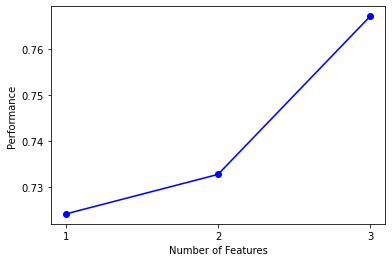

In [23]:
# Plot the accuracy of the model as a function of the number of features
plot_sfs(sfs.get_metric_dict())
plt.show()

## SBS 

In [24]:
# Sequential backward selection
sbs = SFS(lr,
          k_features=3,
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=0)

In [25]:
sbs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          forward=False, k_features=3, scoring='accuracy')

In [26]:
print(sbs.subsets_)

{9: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8), 'cv_scores': array([0.80172414]), 'avg_score': 0.8017241379310345, 'feature_names': ('Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1')}, 8: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7), 'cv_scores': array([0.80172414]), 'avg_score': 0.8017241379310345, 'feature_names': ('Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin')}, 7: {'feature_idx': (0, 1, 2, 3, 4, 5, 7), 'cv_scores': array([0.80172414]), 'avg_score': 0.8017241379310345, 'feature_names': ('Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Resistin')}, 6: {'feature_idx': (0, 1, 2, 3, 5, 7), 'cv_scores': array([0.80172414]), 'avg_score': 0.8017241379310345, 'feature_names': ('Age', 'BMI', 'Glucose', 'Insulin', 'Leptin', 'Resistin')}, 5: {'feature_idx': (0, 1, 2, 3, 7), 'cv_scores': array([0.79310345]), 'avg_score': 0.7931034482758621, 'feature_names': ('Age', 'BMI', 'Glucose', 'Insulin', 'Resistin')}, 4: {'featur

/Users/amlvt225/anaconda3/envs/data_science_env/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/amlvt225/anaconda3/envs/data_science_env/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


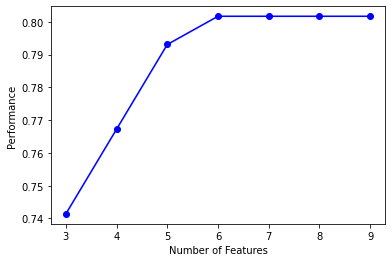

In [27]:
# Plot the accuracy of the model as a function of the number of features
plot_sfs(sbs.get_metric_dict())
plt.show()

In [28]:
# Print a tuple of feature names after 3 features are added
print(sbs.subsets_[3]['feature_names'])

('Age', 'Glucose', 'Resistin')


In [29]:
# Print the accuracy of the model after 3 features are added
print(sbs.subsets_[3]['avg_score'])

0.7413793103448276


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Number of Features', ylabel='Performance'>)

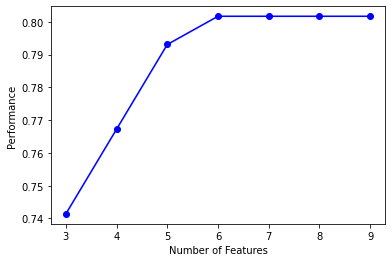

In [30]:
plot_sfs(sbs.get_metric_dict())

# SFFS - Floating Forward 

In [33]:
# Sequential forward floating selection
sffs = SFS(lr,
          k_features=3,
          forward=True,
          floating=True,
          scoring='accuracy',
          cv=0)
sffs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          floating=True, k_features=3, scoring='accuracy')

In [41]:
print(sffs.subsets_[3]['feature_names'])
print(sffs.subsets_[3]['avg_score'])

('Age', 'Glucose', 'Insulin')
0.7672413793103449


## SBFS 

In [36]:
# Sequential backward floating selection
sbfs = SFS(lr,
          k_features=3,
          forward=False,
          floating=True,
          scoring='accuracy',
          cv=0)
sbfs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          floating=True, forward=False, k_features=3,
                          scoring='accuracy')

In [37]:
print(sbfs.subsets_[3]['feature_names'])

('Age', 'Glucose', 'Resistin')


In [40]:
print(sbfs.subsets_[3]['avg_score'])

0.7413793103448276


## NEW ATTEMPT 

In [46]:
# Load the data
health = pd.read_csv("data_breast_cancer.csv")
X = np.array(health.iloc[:,:-1])
y = np.array(health.iloc[:,-1])

In [48]:
health

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [57]:
# Standardize the data
X = StandardScaler().fit_transform(X)

In [58]:
X

array([[-0.57979363, -0.81667527, -1.23922225, ..., -0.07022151,
        -0.54551749, -0.34125061],
       [ 1.60182096, -1.37875056, -0.25829943, ..., -0.69734988,
        -0.86421418, -0.1912238 ],
       [ 1.53948912, -0.89176446, -0.30288683, ...,  1.79799836,
        -0.4416602 ,  0.05821407],
       ...,
       [ 0.47984774,  0.89385486, -0.03536242, ...,  1.81384272,
        -0.3563202 , -0.64049127],
       [ 0.91617066, -0.39854568, -0.70417344, ...,  3.45903808,
        -0.92857684, -0.41283214],
       [ 1.7888165 , -0.0804471 ,  1.79272102, ...,  0.57664406,
        -0.84103616, -1.29074683]])

## What if we want this standardized stuff back into a DF? 

In [77]:
maybe = pd.DataFrame()
for row in X:
    #print(row)
    maybe = maybe.append(pd.DataFrame(row).transpose())

# Don't take the classifier column from health
maybe.columns = health.columns[:-1]
maybe

/var/folders/0n/f4t27bkj4qv8ch75963kg78c0000gn/T/ipykernel_15493/4082524329.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maybe = maybe.append(pd.DataFrame(row).transpose())
/var/folders/0n/f4t27bkj4qv8ch75963kg78c0000gn/T/ipykernel_15493/4082524329.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maybe = maybe.append(pd.DataFrame(row).transpose())
/var/folders/0n/f4t27bkj4qv8ch75963kg78c0000gn/T/ipykernel_15493/4082524329.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maybe = maybe.append(pd.DataFrame(row).transpose())
/var/folders/0n/f4t27bkj4qv8ch75963kg78c0000gn/T/ipykernel_15493/4082524329.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,-0.579794,-0.816675,-1.239222,-0.728739,-0.614282,-0.932334,-0.070222,-0.545517,-0.341251
0,1.601821,-1.378751,-0.258299,-0.688038,-0.548240,-0.930413,-0.697350,-0.864214,-0.191224
0,1.539489,-0.891764,-0.302887,-0.550073,-0.464752,-0.454219,1.797998,-0.441660,0.058214
0,0.666843,-1.243303,-0.927110,-0.676965,-0.574210,-0.876021,-0.441945,-0.158867,1.142718
0,1.788816,-1.294601,-0.258299,-0.644743,-0.521081,-1.042682,-0.786881,-0.336352,0.694716
...,...,...,...,...,...,...,...,...,...
0,-0.766789,-0.146468,-0.258299,-0.666590,-0.534786,1.469335,0.281654,-0.305255,-0.773527
0,0.292852,-0.148468,0.098400,-0.546881,-0.435039,-0.741611,1.649470,-0.600299,-0.593717
0,0.479848,0.893855,-0.035362,-0.427172,-0.365106,1.825348,1.813843,-0.356320,-0.640491
0,0.916171,-0.398546,-0.704173,-0.717467,-0.585883,-0.086651,3.459038,-0.928577,-0.412832


In [81]:
# Logistic regression model - DONT FIT IT
lr = LogisticRegression(max_iter=1000)

In [83]:
# Recursive feature elimination
rfe = RFE(lr, n_features_to_select=3)
rfe.fit(maybe, y)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=3)

In [86]:
print(rfe.ranking_)

[4 1 1 2 3 5 7 1 6]


## Ranking of 1 means it was chosen
### Others indicate the order they were removed in - 7 being the FIRST removed

In [94]:
pd.DataFrame({'features':rfe.feature_names_in_,
             "ranking":rfe.ranking_,
             "to_keep": rfe.support_}).sort_values("ranking")

,features,ranking,to_keep
1,BMI,1,True
2,Glucose,1,True
7,Resistin,1,True
3,Insulin,2,False
4,HOMA,3,False
0,Age,4,False
5,Leptin,5,False
8,MCP.1,6,False
6,Adiponectin,7,False


## Score of the model we chose? 

In [95]:
print(rfe.score(X, y))

0.7327586206896551


/Users/amlvt225/anaconda3/envs/data_science_env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(
